# Use regression to predict the price in the next 10 days
- Train according to the lstm model, based on the input of today's articles, predict the price in the next 10 days

In [1]:
from vnstock import *

## Use RNN for predict stock price next day.

In [2]:

import numpy as np
import pandas as pd
from keras.layers import LSTM, Dense, Dropout
from keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler

class TrainRnn:
    def __init__(self):
        pass

    def fit(self, trainset):    
        self.scaler = MinMaxScaler(feature_range = (0,1))
        training_scaled = self.scaler.fit_transform(trainset)
        self.x_train = []
        self.y_train = []

        for i in range(10, len(training_scaled)):
            self.x_train.append(training_scaled[i-10:i, 0])
            self.y_train.append(training_scaled[i,0])

        self.x_train, self.y_train = np.array(self.x_train), np.array(self.y_train)

        self.train()

    def train(self):
        inputShape = (self.x_train.shape[1],1)
        self.regressor = Sequential()
        self.regressor.add(LSTM(units = 50,return_sequences = True, input_shape = inputShape))
        self.regressor.add(Dropout(0.2))
        self.regressor.add(LSTM(units = 50,return_sequences = True))
        self.regressor.add(Dropout(0.2))
        self.regressor.add(LSTM(units = 50,return_sequences = True))
        self.regressor.add(Dropout(0.2))
        self.regressor.add(LSTM(units = 50))
        self.regressor.add(Dropout(0.2))

        self.regressor.add(Dense(units = 1))

        self.regressor.compile(optimizer = 'adam',loss = 'mean_squared_error')
        self.regressor.summary()
        self.regressor.fit(self.x_train, self.y_train, epochs = 50, batch_size = 32)
    
    def tranform_to_predict(self, data):
        new_data = []
        for i in range(0, len(data)):
            item = np.array(data[i]).reshape(-1,1)
            item = self.scaler.transform(item)
            new_data.append(item)
        new_data = np.array(new_data)
        new_data = np.reshape(new_data, (new_data.shape[0], new_data.shape[1], 1))

        return new_data

    def predict(self, data):
        raw_transform_data = self.tranform_to_predict(data)
        result = self.regressor.predict(raw_transform_data)
        predicted_price = self.scaler.inverse_transform(result)
        return predicted_price



In [6]:
from datetime import date, datetime, timedelta
import numpy as np

def fm_date(date):
    return date.strftime("%Y-%m-%d")

# Get list of dates for the last 365 days
def get_last_days(num_days):
    current_date = datetime.now()
    days_ago = current_date - timedelta(days=num_days)
    date_list = [days_ago + timedelta(days=i) for i in range(num_days)]
    # Format the dates as "%Y-%m-%d" and store them in a new list
    formatted_dates = [fm_date(date) for date in date_list]

    return formatted_dates


dates_train = get_last_days(365)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 10, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 10, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 10, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 10, 50)            20200     
                                                                 
 dropout_2 (Dropout)         (None, 10, 50)            0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                2

2023-11-08 07:18:37.436665: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


8/8 [==============================] - 4s 11ms/step - loss: 0.3047
Epoch 2/50
8/8 [==============================] - 0s 9ms/step - loss: 0.0564
Epoch 3/50
8/8 [==============================] - 0s 13ms/step - loss: 0.0348
Epoch 4/50
8/8 [==============================] - 0s 10ms/step - loss: 0.0258
Epoch 5/50
8/8 [==============================] - 0s 10ms/step - loss: 0.0214
Epoch 6/50
8/8 [==============================] - 0s 10ms/step - loss: 0.0177
Epoch 7/50
8/8 [==============================] - 0s 10ms/step - loss: 0.0128
Epoch 8/50
8/8 [==============================] - 0s 9ms/step - loss: 0.0128
Epoch 9/50
8/8 [==============================] - 0s 9ms/step - loss: 0.0119
Epoch 10/50
8/8 [==============================] - 0s 9ms/step - loss: 0.0109
Epoch 11/50
8/8 [==============================] - 0s 9ms/step - loss: 0.0117
Epoch 12/50
8/8 [==============================] - 0s 9ms/step - loss: 0.0104
Epoch 13/50
8/8 [==============================] - 0s 9ms/step - loss: 0.0113


In [7]:
# stock last 10 days for predict.
data_train_care = data_train[len(data_train) - 10:].tolist()

In [8]:
data_test = [data_train_care]
print(data_train_care)

[[16800], [16400], [16000], [16200], [16100], [15950], [16050], [16600], [16450], [16500]]


In [9]:
def flattern(list):
    return [item for sublist in list for item in sublist]

In [10]:
pred_result = rnn.predict(data_test)
print(pred_result)

1/1 [==============================] - 1s 757ms/step
[[16251.919]]


In [11]:

data_chart = flattern(data_test)
data_chart.append(pred_result[0])

print(data_chart)

# Flatten your data
# data = [item for sublist in data_test for item in sublist]

[[16800], [16400], [16000], [16200], [16100], [15950], [16050], [16600], [16450], [16500], array([16251.919], dtype=float32)]


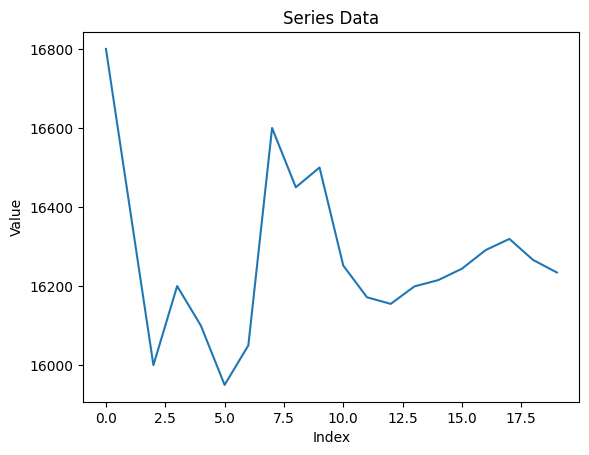

In [39]:
import matplotlib.pyplot as plt

def show_chart(data_chart):
    # Flatten your data
    data = [item for item in data_chart]

    # Create a figure and a set of subplots
    fig, ax = plt.subplots()

    # Plot data
    ax.plot(data_chart)

    # Set title and labels
    ax.set_title('Series Data')
    ax.set_xlabel('Index')
    ax.set_ylabel('Value')

    # Show plot
    plt.show()

show_chart(data_chart)

data_train_care [[16800], [16400], [16000], [16200], [16100], [15950], [16050], [16600], [16450], [16500]]
data_test [[[16800], [16400], [16000], [16200], [16100], [15950], [16050], [16600], [16450], [16500]]]
1/1 [==============================] - 0s 13ms/step
pred_result [[16251.919]]
1/1 [==============================] - 0s 10ms/step
[[[16251.9189453125], [16171.6630859375], [16155.03125], [16199.2822265625], [16215.126953125], [16243.9931640625], [16291.10546875], [16319.3818359375], [16266.0732421875], [16234.494140625]]]


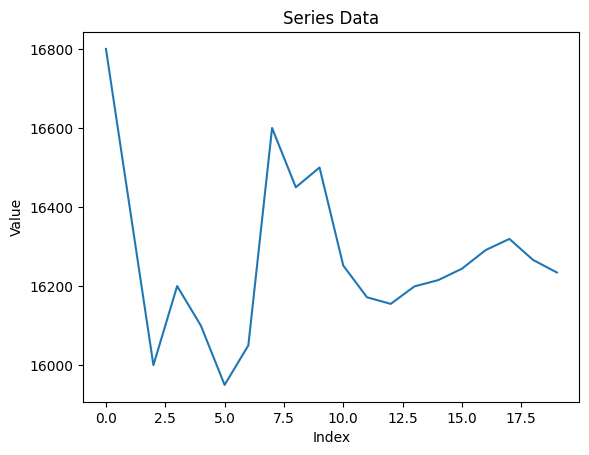

In [41]:
# stock last 10 days for predict.
data_train_care = data_train[len(data_train) - 10:].tolist()
print('data_train_care', data_train_care)
data_test = [data_train_care]
print('data_test', data_test)
pred_result = rnn.predict(data_test)
print('pred_result', pred_result)

def predict_next_days(data, num_days):
    # data_test = [data]
    result_data = data
    for i in range(0, num_days):
        pred_result = rnn.predict(result_data)
        result_data = [result_data[0][1:]]
        result_data[0].append(pred_result[0].tolist())
    return result_data

result_data = predict_next_days(data_test, 10)
print(result_data)

data_chart = flattern(data_test)
for i in range(len(result_data[0])):
    data_chart.append(result_data[0][i])


show_chart(data_chart)

In [42]:
def predict_stock_price(ticker):
    # Get historical data for the last 365 days
    dates_train = get_last_days(365 * 3)
    df_his = stock_historical_data(ticker, dates_train[0], dates_train[len(dates_train) - 1], '1D', 'stock')
    data_train = df_his.iloc[:, 1:2].values

    # Train RNN model
    rnn = TrainRnn()
    rnn.fit(data_train)

    # Predict next 10 days of stock prices
    data_train_care = data_train[len(data_train) - 10:].tolist()
    data_test = [data_train_care]
    result_data = predict_next_days(data_test, 10)

    # Flatten data for plotting
    data_chart = flattern(data_test)
    for i in range(len(result_data[0])):
        data_chart.append(result_data[0][i])

    # Plot results
    show_chart(data_chart)


In [ ]:
def predict_stock_price(tickers):
    # Get historical data for the last 365 days
    dates_train = get_last_days(365 * 3)
    dfs_his = []
    for ticker in tickers:
        df_his = stock_historical_data(ticker, dates_train[0], dates_train[len(dates_train) - 1], '1D', 'stock')
        dfs_his.append(df_his)
    data_train = []
    for df_his in dfs_his:
        data_train.append(df_his.iloc[:, 1:2].values)

    # Train RNN model
    rnns = []
    for i in range(len(tickers)):
        rnn = TrainRnn()
        rnn.fit(data_train[i])
        rnns.append(rnn)

    # Predict next 10 days of stock prices
    data_test = []
    for i in range(len(tickers)):
        data_train_care = data_train[i][len(data_train[i]) - 10:].tolist()
        data_test.append([data_train_care])
    result_data = []
    for i in range(len(tickers)):
        result_data.append(predict_next_days(data_test[i], 10))

    # Flatten data for plotting
    data_chart = []
    for i in range(len(tickers)):
        data_chart_ticker = flattern(data_test[i])
        for j in range(len(result_data[i][0])):
            data_chart_ticker.append(result_data[i][0][j])
        data_chart.append(data_chart_ticker)

    # Plot results
    for i in range(len(tickers)):
        show_chart(data_chart[i])


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 10, 50)            10400     
                                                                 
 dropout_4 (Dropout)         (None, 10, 50)            0         
                                                                 
 lstm_5 (LSTM)               (None, 10, 50)            20200     
                                                                 
 dropout_5 (Dropout)         (None, 10, 50)            0         
                                                                 
 lstm_6 (LSTM)               (None, 10, 50)            20200     
                                                                 
 dropout_6 (Dropout)         (None, 10, 50)            0         
                                                                 
 lstm_7 (LSTM)               (None, 50)               

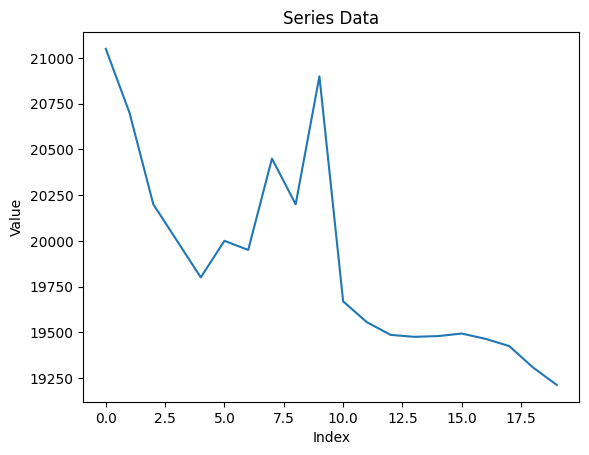

In [43]:
predict_stock_price('VPB')

# Ref:
https://www.investopedia.com/articles/active-trading/101014/basics-algorithmic-trading-concepts-and-examples.asp